In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import json

from typing import Tuple

In [ ]:
# retrieve data csv file
cpc_file_path = '/content/drive/My Drive/ptsa_final_project/realAdExchange/exchange-4_cpc_results.csv'
cpm_file_path = '/content/drive/My Drive/ptsa_final_project/realAdExchange/exchange-4_cpm_results.csv'
cpc_data = pd.read_csv(cpc_file_path)
cpm_data = pd.read_csv(cpm_file_path)

In [ ]:
cpc_data.head()

,timestamp,value
0,2011-07-01 00:15:01,0.091795
1,2011-07-01 01:15:01,0.074414
2,2011-07-01 02:15:01,0.056984
3,2011-07-01 03:15:01,0.071225
4,2011-07-01 04:15:01,0.045466


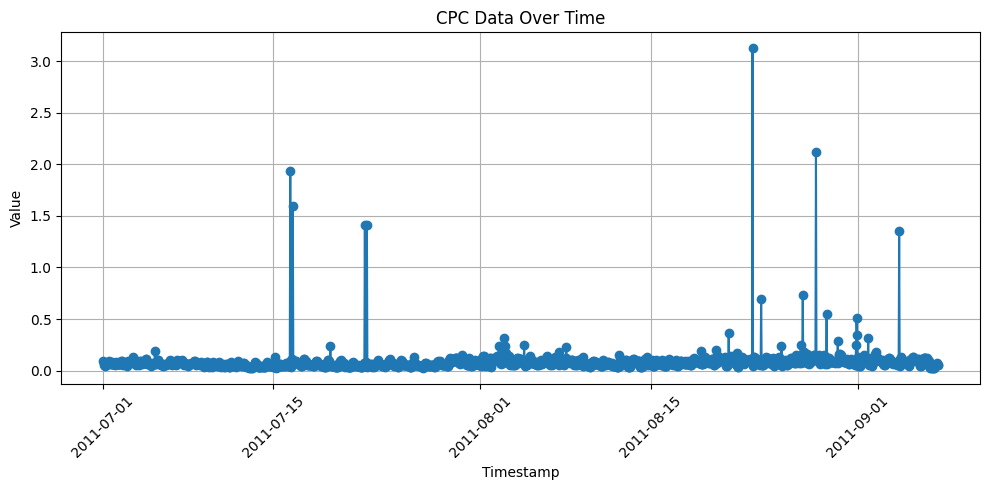

In [ ]:
# Convert the 'timestamp' column to datetime format if it's not already
cpc_data['timestamp'] = pd.to_datetime(cpc_data['timestamp'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(cpc_data['timestamp'], cpc_data['value'], marker='o')
plt.title('CPC Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

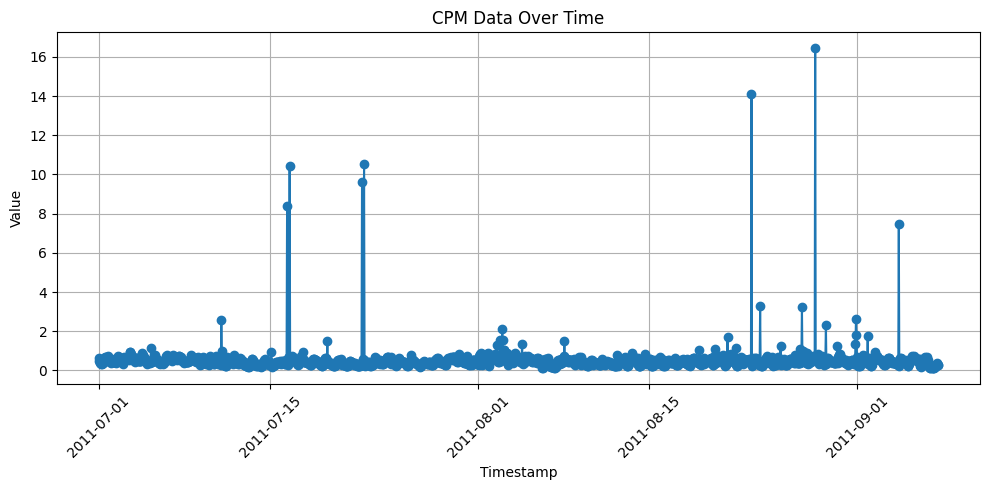

In [ ]:
# Convert the 'timestamp' column to datetime format if it's not already
cpm_data['timestamp'] = pd.to_datetime(cpm_data['timestamp'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(cpm_data['timestamp'], cpm_data['value'], marker='o')
plt.title('CPM Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

In [ ]:
cpc_anomaly_data_path = '/content/drive/My Drive/ptsa_final_project/combined_labels.json'
with open(cpc_anomaly_data_path, 'r') as file:
    anomaly_data = json.load(file)

cpc_anomaly_data = anomaly_data['realAdExchange/exchange-4_cpc_results.csv']
anomaly_timestamps = pd.to_datetime(cpc_anomaly_data)

# Create a dummy variable for anomalies
cpc_data['is_anomaly'] = cpc_data['timestamp'].isin(anomaly_timestamps).astype(int)
cpc_data.head()

,timestamp,value,is_anomaly
0,2011-07-01 00:15:01,0.091795,0
1,2011-07-01 01:15:01,0.074414,0
2,2011-07-01 02:15:01,0.056984,0
3,2011-07-01 03:15:01,0.071225,0
4,2011-07-01 04:15:01,0.045466,0


In [ ]:
normal_data = cpc_data[cpc_data['is_anomaly'] == 0]
abnormal_data = cpc_data[cpc_data['is_anomaly'] == 1]

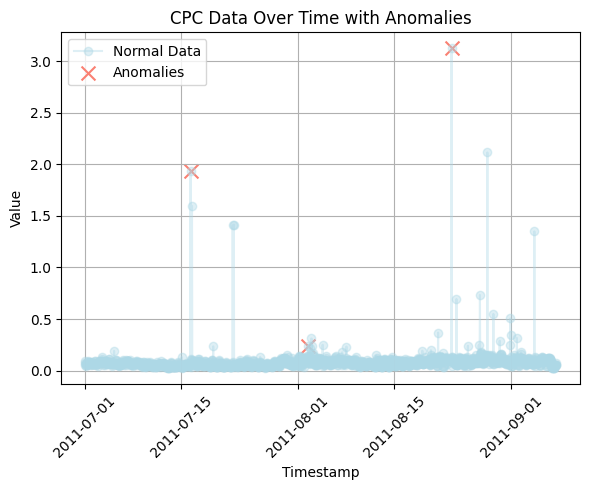

In [ ]:
# Plotting CPC data with anomalies
plt.figure(figsize=(6, 5))
plt.plot(
    cpc_data['timestamp'],
    cpc_data['value'],
    label='Normal Data',
    marker='o',
    color='lightblue',
    linestyle='-',
    alpha=0.4
)
plt.scatter(
    abnormal_data['timestamp'],
    abnormal_data['value'],
    label='Anomalies',
    color='salmon',
    marker='x',
    s=100
)
plt.title('CPC Data Over Time with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
cpm_anomaly_data = anomaly_data['realAdExchange/exchange-4_cpm_results.csv']
cpm_anomaly_timestamps = pd.to_datetime(cpm_anomaly_data)

# Create a dummy variable for anomalies
cpm_data['is_anomaly'] = cpm_data['timestamp'].isin(cpm_anomaly_timestamps).astype(int)
cpm_data.head()

,timestamp,value,is_anomaly
0,2011-07-01 00:15:01,0.618226,0
1,2011-07-01 01:15:01,0.506628,0
2,2011-07-01 02:15:01,0.399551,0
3,2011-07-01 03:15:01,0.482681,0
4,2011-07-01 04:15:01,0.306038,0


In [ ]:
cpm_normal_data = cpm_data[cpm_data['is_anomaly'] == 0]
cpm_abnormal_data = cpm_data[cpm_data['is_anomaly'] == 1]

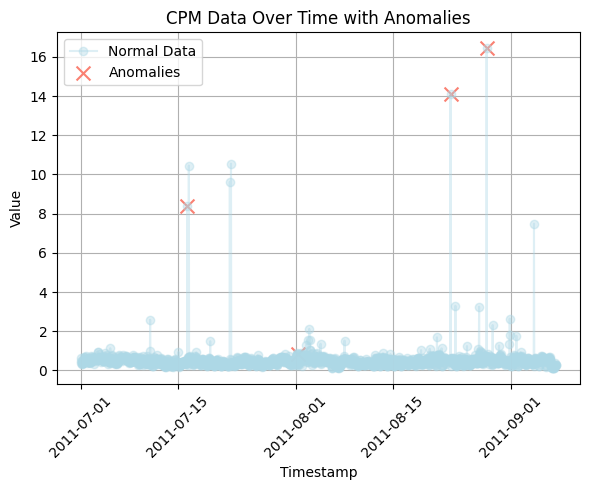

In [ ]:
# Plotting CPM data with anomalies
plt.figure(figsize=(6, 5))
plt.plot(
    cpm_data['timestamp'],
    cpm_data['value'],
    label='Normal Data',
    marker='o',
    color='lightblue',
    linestyle='-',
    alpha=0.4
)
plt.scatter(
    cpm_abnormal_data['timestamp'],
    cpm_abnormal_data['value'],
    label='Anomalies',
    color='salmon',
    marker='x',
    s=100
)
plt.title('CPM Data Over Time with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### ARMA

####check for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data, name="Dataset"):
    adf_result = adfuller(data)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]

    print(f"{name} - ADF Statistic:", adf_statistic)
    print(f"{name} - p-value:", p_value)

    if p_value > 0.05:
        return f"{name} Data is not stationary."
    else:
        return f"{name} Data is stationary."

cpc_stationarity = check_stationarity(cpc_data['value'], name="CPC Data")
cpm_stationarity = check_stationarity(cpm_data['value'], name="CPM Data")

print(cpc_stationarity)
print(cpm_stationarity)

CPC Data - ADF Statistic: -14.080060337347724
CPC Data - p-value: 2.8392050287056306e-26
CPM Data - ADF Statistic: -14.453974360624446
CPM Data - p-value: 7.0230885058218e-27
CPC Data Data is stationary.
CPM Data Data is stationary.


#### ACF and PACF

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

def calculate_acf_pacf(data, n_lags=20):
    acf_values = acf(data, nlags=n_lags)
    pacf_values = pacf(data, nlags=n_lags)
    error_estimate = 1.96 / np.sqrt(len(data))

    return {
        'acf': acf_values,
        'pacf': pacf_values,
        'acf_error': error_estimate,
        'pacf_error': error_estimate
    }

def plot_acf_pacf(acf_values, pacf_values, acf_error, pacf_error, n_lags=20, fontsize=15, color='#7fcdbb'):
    """
    Plot ACF and PACF estimates with 95% confidence intervals.

    Parameters:
        acf_values (array-like): ACF values to plot.
        pacf_values (array-like): PACF values to plot.
        acf_error (float): Error estimate for ACF.
        pacf_error (float): Error estimate for PACF.
        n_lags (int): Number of lags for the plots.
        fontsize (int): Font size for plot labels and titles.
        color (str): Color for the plot.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5), dpi=100)

    # Plot 1: ACF with Error Bars
    ax1.stem(range(n_lags + 1), acf_values, linefmt=color, markerfmt=color, basefmt='k', label='Estimated ACF')
    ax1.axhline(y=acf_error, linestyle='--', color='gray', label="95% Confidence Interval")
    ax1.axhline(y=-acf_error, linestyle='--', color='gray')
    ax1.set_title('ACF Estimate', fontsize=fontsize)
    ax1.set_xlabel(r'$|h|$', fontsize=fontsize)
    ax1.set_ylabel(r'$\rho(|h|)$', fontsize=fontsize)
    ax1.set_ylim([-0.5, 1.1])
    ax1.legend(fontsize=fontsize)

    # Plot 2: PACF with Error Bars
    ax2.stem(range(n_lags + 1), pacf_values, linefmt=color, markerfmt=color, basefmt='k', label='Estimated PACF')
    ax2.axhline(y=pacf_error, linestyle='--', color='gray', label="95% Confidence Interval")
    ax2.axhline(y=-pacf_error, linestyle='--', color='gray')
    ax2.set_title('PACF Estimate', fontsize=fontsize)
    ax2.set_xlabel(r'$|h|$', fontsize=fontsize)
    ax2.set_ylabel(r'$\rho(|h|)$', fontsize=fontsize)
    ax2.set_ylim([-0.5, 1.1])
    ax2.legend(fontsize=fontsize)

    # Display the plots
    plt.tight_layout()
    plt.show()

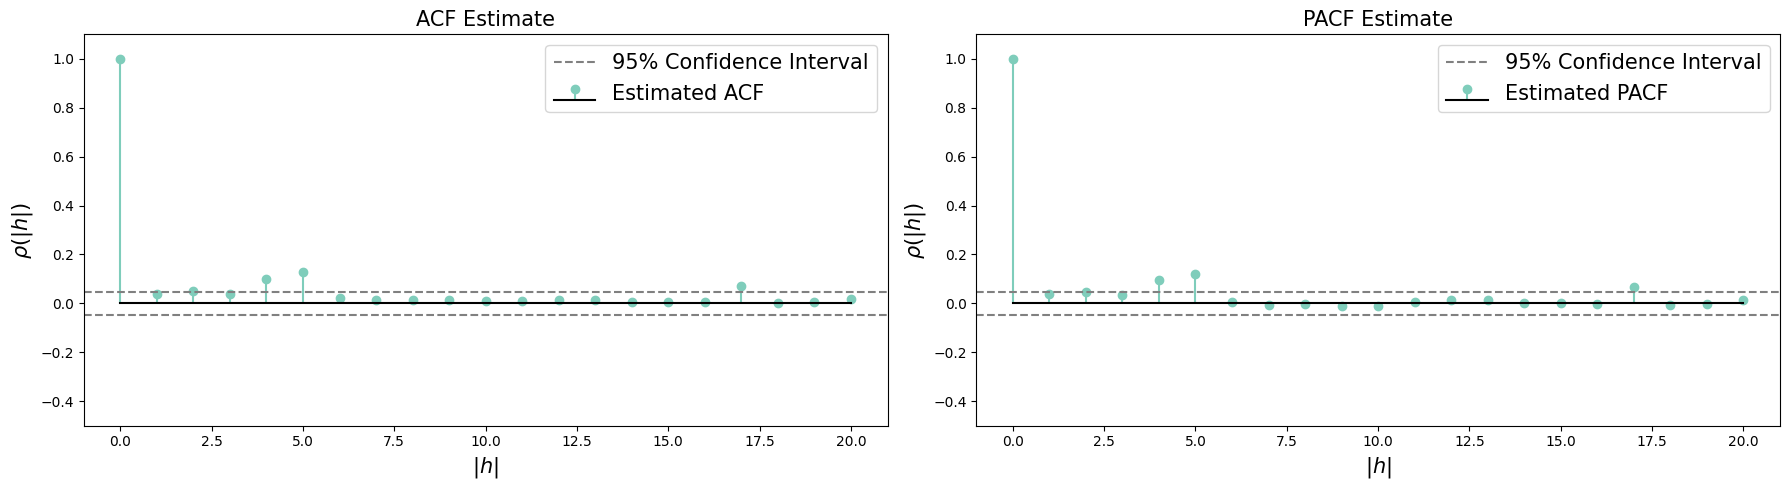

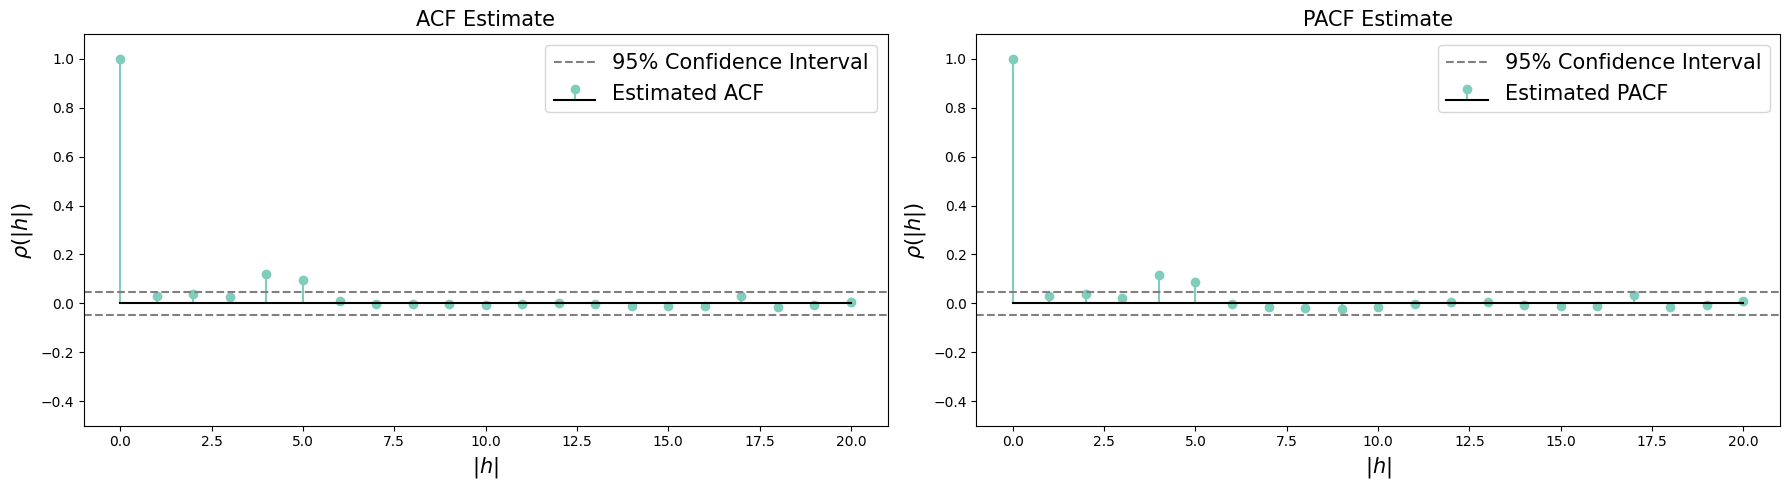

In [ ]:
import matplotlib.pyplot as plt

cpc_value = cpc_data['value']
cpm_value = cpm_data['value']

cpc_result = calculate_acf_pacf(cpc_value, n_lags=20)
cpm_result = calculate_acf_pacf(cpm_value, n_lags=20)

plot_acf_pacf(cpc_result['acf'], cpc_result['pacf'], cpc_result['acf_error'], cpc_result['pacf_error'], n_lags=20)
plot_acf_pacf(cpm_result['acf'], cpm_result['pacf'], cpm_result['acf_error'], cpm_result['pacf_error'], n_lags=20)

The ACF shows one significant spike at lag 1, with subsequent lags mostly falling within the confidence interval. This pattern indicates a short-term dependency on past errors, characteristic of a Moving Average (MA) component, particularly MA(1). Similarly, the PACF also exhibits a single significant spike at lag 1, with the remaining lags showing minimal impact. This suggests a short-term dependency on previous observations, consistent with an AutoRegressive (AR) process, specifically AR(1).

While a few small spikes outside the confidence interval appear at higher lags, they are likely due to noise or weak periodic effects and do not strongly suggest the need for higher-order terms.

Therefore, start with ARMA(1,1), given the ACF and PACF results.

In [ ]:
from typing import Any, Optional
import numpy as np
from scipy.stats import norm, uniform

class ARMAOneOneModel:
    """Class implementing prior, likelihood, posterior, and predictions for an ARMA(1,1) model.

    Args:
        sigma_phi: Sigma for the prior on the AR parameter phi.
        sigma_theta: Sigma for the prior on the MA parameter theta.
        sigma_max: Maximum value for uniform prior on sigma_w.
    """

    def __init__(self: Any, sigma_phi: float, sigma_theta: float, sigma_max: float):
        """Initialization function. See class docstring for parameters."""
        self.sigma_phi = sigma_phi
        self.sigma_theta = sigma_theta
        self.sigma_max = sigma_max

    def log_prior(self: Any, params: np.ndarray) -> float:
        """Calculate the log prior of the parameters.

        Args:
            params: Parameters in the order [phi, theta, sigma_w]

        Returns:
            Log prior of the parameters.
        """
        phi, theta, sigma_w = params

        # Priors for AR and MA coefficients
        log_prior_phi = norm.logpdf(phi, loc=0, scale=self.sigma_phi)
        log_prior_theta = norm.logpdf(theta, loc=0, scale=self.sigma_theta)

        # Prior for the noise standard deviation
        if 0 < sigma_w < self.sigma_max:
            log_prior_sigma = uniform.logpdf(sigma_w, loc=0, scale=self.sigma_max)
        else:
            log_prior_sigma = float('-inf')  # Invalid sigma_w outside the range

        return log_prior_phi + log_prior_theta + log_prior_sigma

    def log_likelihood(self: Any, data: np.ndarray, params: np.ndarray) -> float:
        """Calculate the log likelihood of the data given the parameters.

        Args:
            data: Observed time series.
            params: Parameters in the order [phi, theta, sigma_w]

        Returns:
            Log likelihood of the data given the parameters.
        """
        phi, theta, sigma_w = params
        n = len(data)

        # Initialize residuals (w_t) for the MA component
        residuals = np.zeros(n)

        # Log-likelihood initialization
        log_likelihood = 0

        # Initial value based on AR(1) assumption
        log_likelihood += norm.logpdf(data[0], loc=0, scale=sigma_w)

        for t in range(1, n):
            # ARMA(1,1) process: X_t = phi * X_(t-1) + residual_t + theta * residual_(t-1)
            mean = phi * data[t-1] + theta * residuals[t-1]
            residuals[t] = data[t] - mean  # Update residual
            log_likelihood += norm.logpdf(data[t], loc=mean, scale=sigma_w)

        return log_likelihood

    def log_posterior(self: Any, params: np.ndarray, data: np.ndarray) -> float:
        """Calculate the log posterior of the parameters given the data.

        Args:
            params: Parameters in the order [phi, theta, sigma_w]
            data: Observed time series.

        Returns:
            Log posterior of the parameters given the data.
        """
        log_prior_val = self.log_prior(params)
        if log_prior_val == -np.inf:
            return -np.inf  # Invalid prior leads to invalid posterior

        log_likelihood_val = self.log_likelihood(data, params)
        return log_prior_val + log_likelihood_val

#### Parameter Estimation

In [ ]:
from scipy.optimize import minimize
def find_map_values(data, arma_model, initial_guess=np.array([0.0, 0.0, 1.0])):
    result = minimize(lambda params: -arma_model.log_posterior(params, data), initial_guess, method='nelder-mead',
                      options={'xatol': 1e-8, 'disp': False})
    phi, theta, sigma_w = result.x
    return phi, theta, sigma_w

# Find MAP values for CPC data
sigma_phi = 1.0
sigma_theta = 1.0
sigma_max = 5.0
cpc_arma_model = ARMAOneOneModel(sigma_phi, sigma_theta, sigma_max)
cpc_phi, cpc_theta, cpc_sigma_w = find_map_values(cpc_data['value'],cpc_arma_model)
print(f'CPC Data - phi has MAP value of {cpc_phi}')
print(f'CPC Data - theta has MAP value of {cpc_theta}')
print(f'CPC Data - sigma_w has MAP value of {cpc_sigma_w}')

# Find MAP values for CPM data
# Assuming ARMAOneOneModel is already defined
sigma_phi = 1.0
sigma_theta = 1.0
sigma_max = 5.0
cpm_arma_model = ARMAOneOneModel(sigma_phi, sigma_theta, sigma_max)
cpm_phi, cpm_theta, cpm_sigma_w = find_map_values(cpm_data['value'],cpm_arma_model)
print(f'CPM Data - phi has MAP value of {cpm_phi}')
print(f'CPM Data - theta has MAP value of {cpm_theta}')
print(f'CPM Data - sigma_w has MAP value of {cpm_sigma_w}')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:305: RuntimeWarning: overflow encountered in square
  return -x**2 / 2.0 - _norm_pdf_logC


CPC Data - phi has MAP value of 0.999825504739563
CPC Data - theta has MAP value of -0.9849909256891184
CPC Data - sigma_w has MAP value of 0.1281899327454904
CPM Data - phi has MAP value of 0.9999030392177193
CPM Data - theta has MAP value of -0.9927792332300931
CPM Data - sigma_w has MAP value of 0.7476424464377774


AR coefficient (ϕ) = 0.9998: This is very close to 1, meaning the current value in the time series is almost entirely determined by the previous value. This suggests a strong persistence in the series, implying that the time series is highly autocorrelated.

MA coefficient (θ) = -0.9850: A large magnitude for θ (near -1) suggests that there is a strong negative relationship between the current noise and the previous noise. This indicates that the model is capturing some form of correlated noise.

Noise standard deviation (σ_w) = 0.1282: This value represents the standard deviation of the white noise in the model, which is relatively small, suggesting that the noise (or residual error) is relatively low compared to the data's signal. A small σ_wimplies that your model is fitting the data quite well, with relatively little unexplained noise

##### Evalution: use the covariance matrix to evaluate the uncertainty and relationships between the estimated parameters in your ARMA model

In [ ]:
from statsmodels.tsa.arima_process import arma_acovf

def arma_one_one_cov_matrix(phi: float, theta: float, max_h: int, sigma_w: float) -> np.ndarray:
    """Calculate the covariance matrix for an ARMA(1,1) process.

    Args:
        phi: AR(1) parameter of the ARMA(1,1) process.
        theta: MA(1) parameter of the ARMA(1,1) process.
        max_h: Maximum time index separation to calculate the covariance matrix for.
        sigma_w: Standard deviation of the noise.

    Returns:
        Covariance matrix up to lag of max_h.

    Notes:
        Uses the function arma_acovf to calculate the autocovariance.
        The function arma_acovf takes as input ([phi_0, -phi], [theta_0, theta], max_h + 1, sigma_w ** 2).
    """
    # Define phi_0 and theta_0 as 1.0 (standard for ARMA models)
    phi_0 = 1.0
    theta_0 = 1.0

    # Calculate the autocovariance function for ARMA(1,1)
    acovf = arma_acovf([phi_0, -phi], [theta_0, theta], max_h + 1, sigma_w ** 2)

    # Construct the covariance matrix from the autocovariance values
    cov_matrix = np.zeros((max_h + 1, max_h + 1))
    for i in range(max_h + 1):
        for j in range(max_h + 1):
            cov_matrix[i, j] = acovf[abs(i - j)]

    return cov_matrix

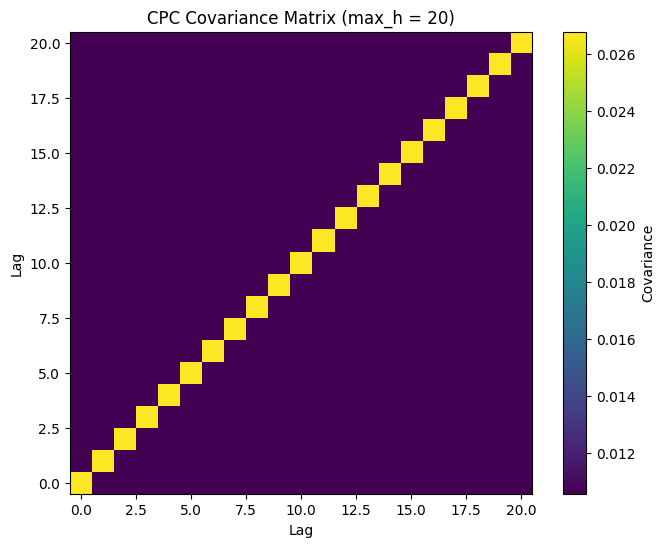

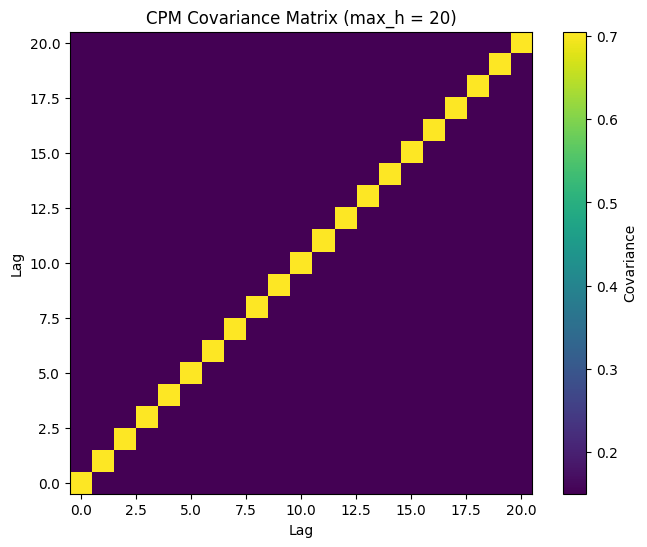

In [ ]:
def plot_covariance_matrix(dataset_name, phi, theta, sigma_w, max_h=20):
    cov_matrix = arma_one_one_cov_matrix(phi, theta, max_h, sigma_w)

    plt.figure(figsize=(8, 6))
    plt.imshow(cov_matrix, cmap='viridis', origin='lower')
    plt.colorbar(label='Covariance')
    plt.title(f'{dataset_name} Covariance Matrix (max_h = {max_h})')
    plt.xlabel('Lag')
    plt.ylabel('Lag')
    plt.show()

# Call the function to plot the covariance matrix for both datasets
plot_covariance_matrix("CPC", cpc_phi, cpc_theta, cpc_sigma_w)
plot_covariance_matrix("CPM", cpm_phi, cpm_theta, cpm_sigma_w)

#### Check Residuals

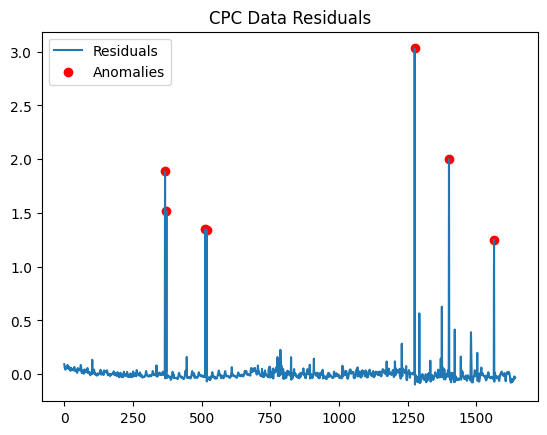

Anomalous time stamps:
2011-07-16 09:15:01
2011-07-16 14:15:01
2011-07-22 12:15:01
2011-07-22 16:15:01
2011-08-23 08:15:01
2011-08-28 13:15:01
2011-09-04 09:15:01


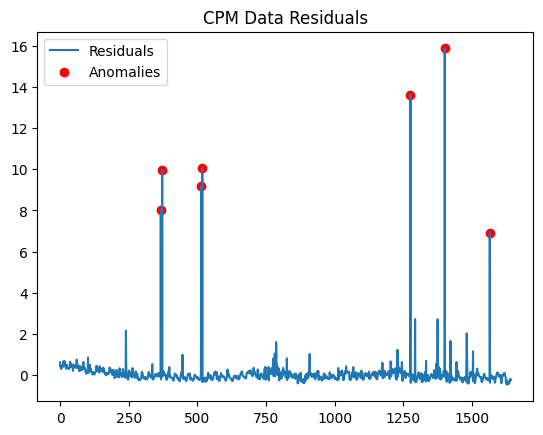

Anomalous time stamps:
2011-07-16 09:15:01
2011-07-16 14:15:01
2011-07-22 12:15:01
2011-07-22 16:15:01
2011-08-23 08:15:01
2011-08-28 13:15:01
2011-09-04 09:15:01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_residuals(data, phi, theta, threshold):
    predicted_values = np.zeros_like(data)
    for t in range(1, len(data)):
        predicted_values[t] = phi * data[t-1] + theta * (data[t-1] - predicted_values[t-1])

    residuals = data - predicted_values
    anomaly_labels = np.where(np.abs(residuals) > threshold, 1, 0)  # Label anomalies
    return residuals, predicted_values, anomaly_labels

def plot_residuals(residuals, anomaly_labels, title='Residuals'):
    plt.plot(residuals, label='Residuals')

    # Plot anomalies
    anomaly_times = np.where(anomaly_labels == 1)[0]  # Get indices where anomaly is 1
    plt.scatter(anomaly_times, residuals[anomaly_times], color='red', label='Anomalies')

    plt.title(title)
    plt.legend()
    plt.show()

def print_anomaly_time_stamps(anomaly_labels, data_time_stamps):
    anomaly_times = np.where(anomaly_labels == 1)[0]

    if len(anomaly_times) > 0:
        print("Anomalous time stamps:")
        for idx in anomaly_times:
            print(data_time_stamps[idx])
    else:
        print("No anomalies detected.")

# setting a threshold for anomalies
cpc_threshold_value = 1.0
cpm_threshold_value = 3.0

# CPC data
cpc_residuals, cpc_predicted_values, cpc_anomalies = calculate_residuals(cpc_data['value'], cpc_phi, cpc_theta, threshold=cpc_threshold_value)
plot_residuals(cpc_residuals, cpc_anomalies, title='CPC Data Residuals')
print_anomaly_time_stamps(cpc_anomalies, cpc_data['timestamp'])

# CPM data
cpm_residuals, cpm_predicted_values, cpm_anomalies = calculate_residuals(cpm_data['value'], cpm_phi, cpm_theta, threshold=cpm_threshold_value)
plot_residuals(cpm_residuals, cpm_anomalies, title='CPM Data Residuals')
print_anomaly_time_stamps(cpm_anomalies, cpm_data['timestamp'])


### Discrete HMM

In [ ]:
# A useful helper function.
def one_hot_encode(state_index: int, dim_z: int) -> np.ndarray:
    """Return the one hot encoding for a latent state.

    Args:
        state_index: Latent state index. Counts from zero.
        dim_z: Number of latent states.

    Returns:
        One-hot encoding.
    """
    z_encode = np.zeros(dim_z)
    z_encode[state_index] = 1
    return z_encode


# Our class of interest.
class DiscreteHMM:
    """Class that implements a discrete HMM.

    Args:
        pi: Initial guess for the vector pi.
        transition_matrix: Initial guess for the transition matrix.
    """
    def __init__(self, pi: np.ndarray, transition_matrix: np.ndarray):
        """Initialize our class."""
        # Save the initial guess.
        self.pi = pi
        self.transition_matrix = transition_matrix

        # Some useful variables.
        self.dim_z = len(self.pi)

    def calc_alpha_hat(self, observations: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """Given the observations, calculate the normalized forward pass.

        Args:
            observations: Observations for each time step.

        Returns:
            Normalized forward pass for each time step and latent state and
            normalization constants.
        """
        # Initialize a placeholder.
        alpha_hat = np.zeros((len(observations) + 1, self.dim_z))
        c_t = np.zeros((len(observations) + 1))

        # t=0 value. Consider c_0 = 1 for simplicity.
        alpha_hat[0] = self.pi # TODO
        c_t[0] = 1

        # Recurse forward.
        for t in range(1, len(observations) + 1):
            alpha_tilde = np.zeros(self.dim_z)
            for i in range(self.dim_z):
                sum_over_j = 0.0
                for j in range(self.dim_z):
                    sum_over_j += alpha_hat[t - 1, j] * self.transition_matrix[j, i]
                # Multiply by the observation probability (corrected argument order)
                alpha_tilde[i] = sum_over_j * observation_probability(
                    i, observations[t - 1]
                )

            c_t[t] = np.sum(alpha_tilde)
            alpha_hat[t] = alpha_tilde / c_t[t]
        return alpha_hat, c_t

    def calc_beta_hat(self, observations: np.ndarray) -> np.ndarray:
        """Given the observations, calculate the normalized backward pass.

        Args:
            observations: Observations for each time step.

        Returns:
            Normalized backward pass for each time step.
        """
        # Initialize a placeholder.
        beta_hat = np.zeros((len(observations) + 1, self.dim_z))

        # Get the c_t values
        _, c_t = self.calc_alpha_hat(observations)

        # t=0 value.
        beta_hat[-1] = 1 # TODO # \hat{\beta}(\pmb{z}_T) = 1

        # Recurse backward.
        for t in range(len(observations) - 1, -1, -1):
            beta_tilde = np.zeros(self.dim_z)
            for i in range(self.dim_z):
                sum_over_j = 0.0
                for j in range(self.dim_z):
                    sum_over_j += self.transition_matrix[i, j] * observation_probability(
                        j, observations[t]
                    ) * beta_hat[t + 1, j]
                beta_tilde[i] = sum_over_j
            # Normalize beta_tilde
            c_t_next = c_t[t + 1]
            beta_hat[t] = beta_tilde / c_t_next # TODO

        return beta_hat

    def p_zt_xt(self, observations: np.ndarray, alpha_hat: np.ndarray,
                beta_hat: np.ndarray, c_t: np.ndarray):
        """Calculate p(z_t|x_{1:t}) for all t.

        Args:
            observations: Observations for each time step.
            alpha_hat: Normalized forward pass output.
            beta_hat: Normalized backward pass output.
            c_t: Normalization constants for forward and backward pass.

        Returns:
            Value of p(z_t|x_{1:t}) for each time step and latent state index.

        Notes:
            You may not need all of the inputs.
        """
        return alpha_hat # TODO

    def p_zt_xT(self, observations: np.ndarray, alpha_hat: np.ndarray,
                beta_hat: np.ndarray, c_t: np.ndarray):
        """Calculate p(z_t|x_{1:T}) for all t.

        Args:
            observations: Observations for each time step.
            alpha_hat: Normalized forward pass output.
            beta_hat: Normalized backward pass output.
            c_t: Normalization constants for forward and backward pass.

        Returns:
            Value of p(z_t|x_{1:T}) for each time step and latent state index.

        Notes:
            You may not need all of the inputs.
        """
        return alpha_hat * beta_hat # TODO

    def log_p_sequence_xt(self, observations: np.ndarray, latent_sequence: np.ndarray) -> float:
        """Log likelihood of the sequence given the data p(z_{1:T}|x_{1:T}).

        Args:
            observations: Observations for each time step.
            latent_sequence: Proposed latent sequence. Can be a probability
                distribution at each time step, in which case argmax will be taken
                to determine proposal.

        Returns:
            Log of the probability of the sequence given the data.
        """
        log_probability = 0
        sequence_indices = np.argmax(latent_sequence, axis=-1)

        # Log probability for first time step.
        log_probability += np.log(self.pi[sequence_indices[0]]) # TODO

        # Log probability for remaining time steps.
        for t in range(len(observations)):
            log_probability += np.log(self.transition_matrix[sequence_indices[t - 1], sequence_indices[t]])
            log_probability += np.log(observation_probability(sequence_indices[t], observations[t])) # TODO

        return log_probability


    def viterbi_algorithm(self, observations: np.ndarray) -> np.ndarray:
        """Run the Viterbi algorithm on our dHMM observations.

        Args:
            observations: Observations for each time step.

        Returns:
            One-hot encoding of MAP sequence.
        """
        w_matrix = np.zeros((len(observations)+1, self.dim_z))
        m_matrix = np.zeros((len(observations), self.dim_z), dtype=int)

        # The first value of our weight matrix is just log of pi.
        w_matrix[0] = np.log(self.pi) # TODO

        # Fill out the weight matrix and the argmax matrix m.
        for t in range(len(observations)):
            for i in range(self.dim_z):
                # Let's find the best path to this state
                transition_probs = w_matrix[t] + np.log(self.transition_matrix[:, i])
                m_matrix[t,i] = np.argmax(transition_probs) # TODO
                w_matrix[t+1,i] = np.max(transition_probs) + np.log(observation_probability(i, observations[t])) # TODO

        # Now we can work backwards to find the most likely path.
        map_z_path = np.ones(len(observations)+1, dtype=int) - 1 # Make sure you fill it all in!

        # MAP z_T.
        map_z_path[-1] = np.argmax(w_matrix[-1]) # TODO

        # Remaining z_t.
        for t in range(len(observations)-1, -1, -1):
            map_z_path[t] = m_matrix[t, map_z_path[t + 1]] # TODO

        # Turn it into our one-hot encoding
        map_z_encoded = np.zeros((len(observations) + 1, self.dim_z))
        for t in range(len(map_z_path)):
            map_z_encoded[t] = one_hot_encode(map_z_path[t], self.dim_z)

        return map_z_encoded

In [ ]:
def observation_probability(latent_index: int, observation: np.ndarray) -> float:
    """Given an observation and corresponding latent state, evaluate the likelihood."""
    return stats.multivariate_normal.pdf(observation, mean=GAUSS_MEANS[latent_index], cov=GAUSS_COVS[latent_index])


We first train a model for cpc dataset.

In [ ]:
cpc_observations = cpc_data['value'].values
cpc_true_states = cpc_data['is_anomaly'].values
print(np.mean(cpc_data['value']))
print(np.mean(cpm_data['value']))


0.0864391573507037
0.5338304411440268


In [ ]:
obs_dim = 1
GAUSS_MEANS = [np.array([0.0864]), np.array([0.5338])]
GAUSS_COVS = [np.eye(obs_dim) * 0.2, np.eye(obs_dim) * 0.2]
PI = np.array([0.8, 0.2])
A_MAT = np.array([[0.9, 0.1], [0.1, 0.9]])

# Prepare the data
cpc_observations = cpc_data['value'].values.reshape(-1, 1)
cpc_true_states = cpc_data['is_anomaly'].values
# Initialize model
dhmm = DiscreteHMM(pi=PI, transition_matrix=A_MAT)

# Train the model
alpha_hat, c_t = dhmm.calc_alpha_hat(cpc_observations)
beta_hat = dhmm.calc_beta_hat(cpc_observations)
cpc_predicted_states = dhmm.viterbi_algorithm(cpc_observations)

print("CPC Predicted States:", np.argmax(cpc_predicted_states, axis=-1))

# Add the predicted states as a new column to the cpc_data DataFrame
cpc_data['dhmm_predicted_state'] = np.argmax(cpc_predicted_states, axis=-1)[:-1]

print("CPC Predicted States:")
print(cpc_data.head())



CPC Predicted States: [0 0 0 ... 0 0 0]
CPC Predicted States:
            timestamp     value  is_anomaly  dhmm_predicted_state  \
0 2011-07-01 00:15:01  0.091795           0                     0   
1 2011-07-01 01:15:01  0.074414           0                     0   
2 2011-07-01 02:15:01  0.056984           0                     0   
3 2011-07-01 03:15:01  0.071225           0                     0   
4 2011-07-01 04:15:01  0.045466           0                     0   

   lstm_predicted_abnormal  is_abnormal  
0                      0.0            0  
1                      0.0            0  
2                      0.0            0  
3                      0.0            0  
4                      0.0            0  


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict the results
predicted_states_idx = np.argmax(cpc_predicted_states, axis=-1)

# Evaluation
precision = precision_score(cpc_true_states, predicted_states_idx[:-1])
recall = recall_score(cpc_true_states, predicted_states_idx[:-1])
f1 = f1_score(cpc_true_states, predicted_states_idx[:-1])

print(f"CPC Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


CPC Precision: 0.00, Recall: 0.00, F1-Score: 0.00


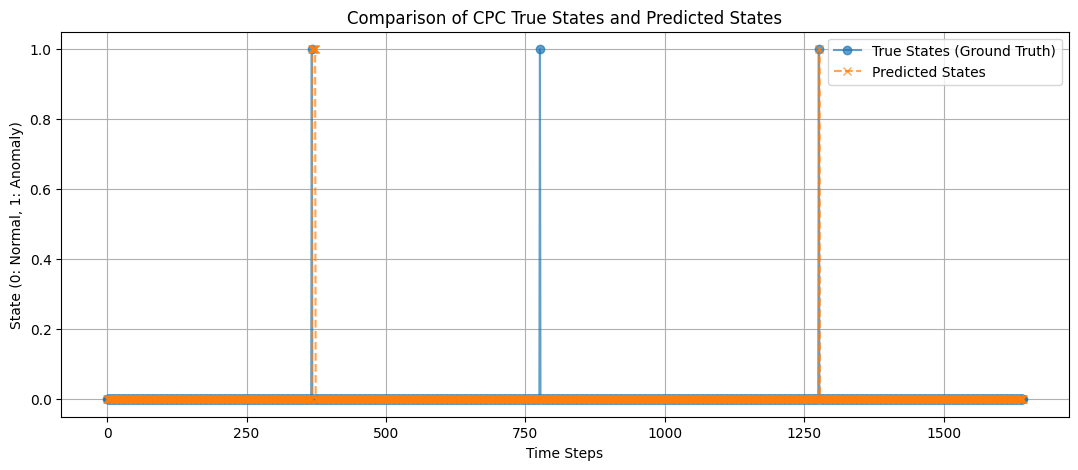

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.plot(cpc_true_states, label='True States (Ground Truth)', linestyle='-', marker='o', alpha=0.7)
plt.plot(predicted_states_idx[:-1], label='Predicted States', linestyle='--', marker='x', alpha=0.7)

plt.xlabel('Time Steps')
plt.ylabel('State (0: Normal, 1: Anomaly)')
plt.title('Comparison of CPC True States and Predicted States')
plt.legend()
plt.grid()
plt.show()

We then train dataset for cpm dataset.

In [ ]:
cpm_observations = cpm_data['value'].values
cpm_true_states = cpm_data['is_anomaly'].values

In [ ]:
obs_dim = 1
GAUSS_MEANS = [np.array([0.5]), np.array([1.5])]
GAUSS_COVS = [np.eye(obs_dim) * 0.2, np.eye(obs_dim) * 0.2]
PI = np.array([0.8, 0.2])
A_MAT = np.array([[0.9, 0.1], [0.1, 0.9]])

# Prepare the data
cpm_observations = cpm_data['value'].values.reshape(-1, 1)
cpm_true_states = cpm_data['is_anomaly'].values

# Initialize parameters
dhmm = DiscreteHMM(pi=PI, transition_matrix=A_MAT)

# Train the model
alpha_hat, c_t = dhmm.calc_alpha_hat(cpm_observations)
beta_hat = dhmm.calc_beta_hat(cpm_observations)
cpm_predicted_states = dhmm.viterbi_algorithm(cpm_observations)

print("Predicted States:", np.argmax(cpm_predicted_states, axis=-1))

# Add the predicted states as a new column to the cpc_data DataFrame
cpm_data['dhmm_predicted_state'] = np.argmax(cpm_predicted_states, axis=-1)[:-1]

print("CPM Predicted States:")
print(cpm_data.head())


Predicted States: [0 0 0 ... 0 0 0]
CPM Predicted States:
            timestamp     value  is_anomaly  dhmm_predicted_state  \
0 2011-07-01 00:15:01  0.618226           0                     0   
1 2011-07-01 01:15:01  0.506628           0                     0   
2 2011-07-01 02:15:01  0.399551           0                     0   
3 2011-07-01 03:15:01  0.482681           0                     0   
4 2011-07-01 04:15:01  0.306038           0                     0   

   lstm_predicted_abnormal  arma  lstm_value  
0                      0.0     0    0.000000  
1                      0.0     0    0.002021  
2                      0.0     0    0.002082  
3                      0.0     0    0.002143  
4                      0.0     0    0.002095  


In [ ]:
# Predict the results
cpm_predicted_states_idx = np.argmax(cpm_predicted_states, axis=-1)

# Evaluation
cpm_precision = precision_score(cpm_true_states, cpm_predicted_states_idx[:-1])
recall = recall_score(cpm_true_states, predicted_states_idx[:-1])
f1 = f1_score(cpm_true_states, predicted_states_idx[:-1])

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Precision: 0.00, Recall: 0.00, F1-Score: 0.00


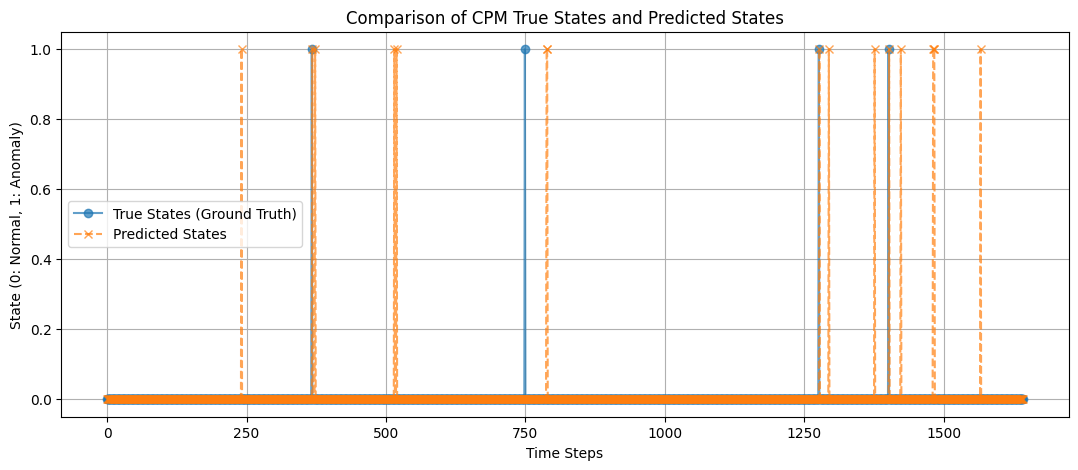

In [ ]:
plt.figure(figsize=(13, 5))
plt.plot(cpm_true_states, label='True States (Ground Truth)', linestyle='-', marker='o', alpha=0.7)
plt.plot(cpm_predicted_states_idx[:-1], label='Predicted States', linestyle='--', marker='x', alpha=0.7)

plt.xlabel('Time Steps')
plt.ylabel('State (0: Normal, 1: Anomaly)')
plt.title('Comparison of CPM True States and Predicted States')
plt.legend()
plt.grid()
plt.show()

### LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# -------------------------
# Load and prepare the data
# -------------------------
# Assuming cpc_data is already loaded with columns: timestamp, value, is_abnormal
cpc_data = cpc_data.sort_values(by='timestamp')

# Extract values and labels
values = cpc_data['value'].values.reshape(-1, 1)
labels = cpc_data['is_anomaly'].values

# Optional: scale the values for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# -------------------------
# Create sequences
# -------------------------
seq_length = 1  # number of timesteps to use as input for the LSTM
X = []
y = []

for i in range(seq_length, len(scaled_values)):
    X.append(scaled_values[i-seq_length:i, 0])
    y.append(labels[i])

X = np.array(X)
y = np.array(y)

# Reshape X to [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# -------------------------
# Use the entire dataset for both training and testing
# -------------------------
X_train, y_train = X, y
X_test, y_test = X, y

# -------------------------
# Build LSTM model
# -------------------------
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# -------------------------
# Train the model on the entire dataset
# -------------------------
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# -------------------------
# Evaluate the model on the same data
# -------------------------
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# -------------------------
# Predict anomalies
# -------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

# y_pred gives you predicted anomalies on the entire dataset.


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9748 - loss: 0.6662 - val_accuracy: 0.9982 - val_loss: 0.5277
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9996 - loss: 0.4340 - val_accuracy: 0.9982 - val_loss: 0.1372
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9992 - loss: 0.0927 - val_accuracy: 0.9982 - val_loss: 0.0295
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9965 - loss: 0.0327 - val_accuracy: 0.9982 - val_loss: 0.0179
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9977 - loss: 0.0218 - val_accuracy: 0.9982 - val_loss: 0.0151
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9986 - loss: 0.0139 - val_accuracy: 0.9982 - val_loss: 0.0142
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9981 - loss: 0.0157 - val_accuracy: 0.9982 - val_loss: 0.0137
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0069 - val_accuracy: 0.9982 - val_loss: 0.0135
Ep

In [ ]:
import numpy as np

# Assume these objects are already defined:
# model: the trained LSTM model
# scaler: the same scaler used to scale 'value' during training
# seq_length: the sequence length used during training
# cpc_data: DataFrame with columns ['timestamp', 'value', 'is_abnormal']

# Sort by timestamp to ensure correct order
cpc_data = cpc_data.sort_values(by='timestamp')

# Scale the 'value' column using the same scaler used during training
scaled_values = scaler.transform(cpc_data[['value']])

# Create sequences for prediction
X_test = []
for i in range(seq_length, len(scaled_values)):
    X_test.append(scaled_values[i-seq_length:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get model predictions (probabilities of being abnormal)
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.001766).astype(int).flatten()

# Align predictions back to original dataframe
# The first seq_length rows have no predictions, so we fill them with NaN or 0
pred_column = np.empty(len(cpc_data))
pred_column[:] = np.nan

# Insert predictions starting from the seq_length-th row
pred_column[0] = 0
pred_column[seq_length:] = y_pred

# Add the prediction column to the DataFrame
cpc_data['lstm_predicted_abnormal'] = pred_column

pred_column = np.empty(len(cpc_data))
pred_column[:] = np.nan

# Insert predictions starting from the seq_length-th row
pred_column[0] = 0
y_pred_prob = y_pred_prob.reshape(-1)
pred_column[seq_length:] = y_pred_prob
cpc_data['lstm_value'] = pred_column

print(cpc_data.head())

# cpc_data now has a new column 'predicted_abnormal' indicating model predictions.
# Rows before seq_length have NaN because not enough historical data existed
# to make a prediction.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
            timestamp     value  is_anomaly  dhmm_predicted_state  \
0 2011-07-01 00:15:01  0.091795           0                     0   
1 2011-07-01 01:15:01  0.074414           0                     0   
2 2011-07-01 02:15:01  0.056984           0                     0   
3 2011-07-01 03:15:01  0.071225           0                     0   
4 2011-07-01 04:15:01  0.045466           0                     0   

   lstm_predicted_abnormal  is_abnormal  lstm_value  
0                      0.0            0    0.000000  
1                      0.0            0    0.001614  
2                      0.0            0    0.001654  
3                      0.0            0    0.001697  
4                      0.0            0    0.001662  


In [ ]:
# Sort the dataframe by the 'lstm_value' column
sorted_cpc_data = cpc_data.sort_values(by='lstm_value', ascending=False)

# Print the first 20 entries
print(sorted_cpc_data[['timestamp', 'lstm_value']].head(30))


               timestamp  lstm_value
1627 2011-09-06 23:15:01    0.001780
1631 2011-09-07 03:15:01    0.001777
287  2011-07-13 01:15:01    0.001777
1633 2011-09-07 05:15:01    0.001775
339  2011-07-15 05:15:01    0.001771
292  2011-07-13 06:15:01    0.001769
1628 2011-09-07 00:15:01    0.001768
288  2011-07-13 02:15:01    0.001767
1634 2011-09-07 06:15:01    0.001766
1635 2011-09-07 07:15:01    0.001766
629  2011-07-27 07:15:01    0.001766
293  2011-07-13 07:15:01    0.001765
520  2011-07-22 18:15:01    0.001765
1034 2011-08-13 06:15:01    0.001765
289  2011-07-13 03:15:01    0.001764
290  2011-07-13 04:15:01    0.001764
628  2011-07-27 06:15:01    0.001763
317  2011-07-14 07:15:01    0.001763
1032 2011-08-13 04:15:01    0.001763
310  2011-07-14 00:15:01    0.001762
436  2011-07-19 06:15:01    0.001762
340  2011-07-15 06:15:01    0.001762
1010 2011-08-12 06:15:01    0.001762
461  2011-07-20 07:15:01    0.001762
484  2011-07-21 06:15:01    0.001762
309  2011-07-13 23:15:01    0.001761
3

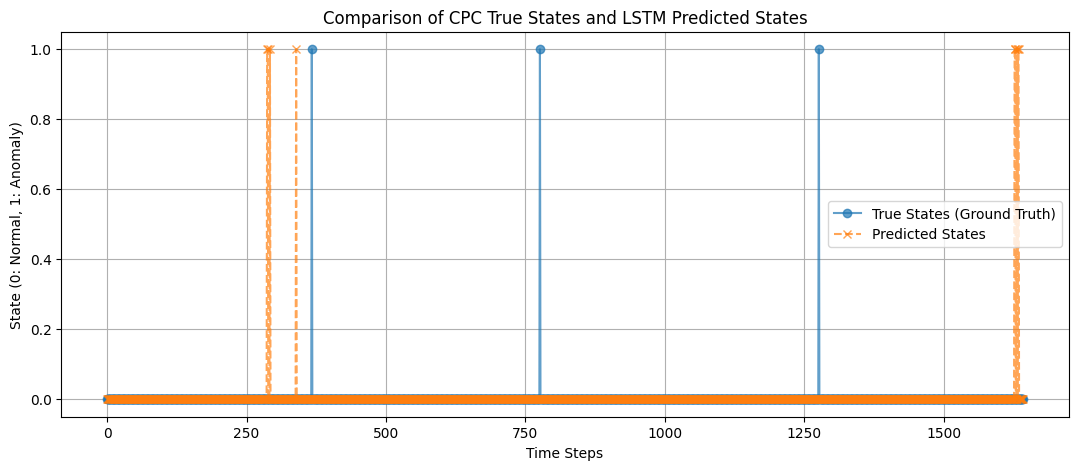

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.plot(cpc_true_states, label='True States (Ground Truth)', linestyle='-', marker='o', alpha=0.7)
plt.plot(cpc_data['lstm_predicted_abnormal'], label='Predicted States', linestyle='--', marker='x', alpha=0.7)

plt.xlabel('Time Steps')
plt.ylabel('State (0: Normal, 1: Anomaly)')
plt.title('Comparison of CPC True States and LSTM Predicted States')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# -------------------------
# Load and prepare the data
# -------------------------
# Assuming cpc_data is already loaded with columns: timestamp, value, is_abnormal
cpm_data = cpm_data.sort_values(by='timestamp')

# Extract values and labels
values = cpm_data['value'].values.reshape(-1, 1)
labels = cpm_data['is_anomaly'].values

# Optional: scale the values for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# -------------------------
# Create sequences
# -------------------------
seq_length = 1  # number of timesteps to use as input for the LSTM
X = []
y = []

for i in range(seq_length, len(scaled_values)):
    X.append(scaled_values[i-seq_length:i, 0])
    y.append(labels[i])

X = np.array(X)
y = np.array(y)

# Reshape X to [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# -------------------------
# Use the entire dataset for both training and testing
# -------------------------
X_train, y_train = X, y
X_test, y_test = X, y

# -------------------------
# Build LSTM model
# -------------------------
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# -------------------------
# Train the model on the entire dataset
# -------------------------
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# -------------------------
# Evaluate the model on the same data
# -------------------------
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# -------------------------
# Predict anomalies
# -------------------------
y_pred = (model.predict(X_test) > 0).astype(int)

# y_pred gives you predicted anomalies on the entire dataset.


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9625 - loss: 0.6637 - val_accuracy: 0.9976 - val_loss: 0.5145
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9984 - loss: 0.4175 - val_accuracy: 0.9976 - val_loss: 0.1244
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9979 - loss: 0.0865 - val_accuracy: 0.9976 - val_loss: 0.0296
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9973 - loss: 0.0284 - val_accuracy: 0.9976 - val_loss: 0.0203
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9967 - loss: 0.0277 - val_accuracy: 0.9976 - val_loss: 0.0183
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9986 - loss: 0.0142 - val_accuracy: 0.9976 - val_loss: 0.0175
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9969 - loss: 0.0238 - val_accuracy: 0.9976 - val_loss: 0.0173
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9973 - loss: 0.0206 - val_accuracy: 0.9976 - val_loss: 0.0172

In [ ]:
import numpy as np

# Assume these objects are already defined:
# model: the trained LSTM model
# scaler: the same scaler used to scale 'value' during training
# seq_length: the sequence length used during training
# cpc_data: DataFrame with columns ['timestamp', 'value', 'is_abnormal']

# Sort by timestamp to ensure correct order
cpm_data = cpm_data.sort_values(by='timestamp')

# Scale the 'value' column using the same scaler used during training
scaled_values = scaler.transform(cpm_data[['value']])

# Create sequences for prediction
X_test = []
for i in range(seq_length, len(scaled_values)):
    X_test.append(scaled_values[i-seq_length:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get model predictions (probabilities of being abnormal)
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.002285).astype(int).flatten()

# Align predictions back to original dataframe
# The first seq_length rows have no predictions, so we fill them with NaN or 0
pred_column = np.empty(len(cpm_data))
pred_column[:] = np.nan

# Insert predictions starting from the seq_length-th row
pred_column[0] = 0
pred_column[seq_length:] = y_pred

# Add the prediction column to the DataFrame
cpm_data['lstm_predicted_abnormal'] = pred_column

pred_column = np.empty(len(cpm_data))
pred_column[:] = np.nan

# Insert predictions starting from the seq_length-th row
pred_column[0] = 0
y_pred_prob = y_pred_prob.reshape(-1)
pred_column[seq_length:] = y_pred_prob
cpm_data['lstm_value'] = pred_column

print(cpm_data.head())

# cpc_data now has a new column 'predicted_abnormal' indicating model predictions.
# Rows before seq_length have NaN because not enough historical data existed
# to make a prediction.


14/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
            timestamp     value  is_anomaly  dhmm_predicted_state  \
0 2011-07-01 00:15:01  0.618226           0                     0   
1 2011-07-01 01:15:01  0.506628           0                     0   
2 2011-07-01 02:15:01  0.399551           0                     0   
3 2011-07-01 03:15:01  0.482681           0                     0   
4 2011-07-01 04:15:01  0.306038           0                     0   

   lstm_predicted_abnormal  arma  lstm_value  
0                      0.0     0    0.000000  
1                      0.0     0    0.002040  
2                      0.0     0    0.002102  
3                      0.0     0    0.002165  
4                      0.0     0    0.002116  


In [ ]:
# Sort the dataframe by the 'lstm_value' column
sorted_cpm_data = cpm_data.sort_values(by='lstm_predicted_abnormal', ascending=False)

# Print the first 20 entries
print(sorted_cpm_data[['timestamp', 'lstm_predicted_abnormal']].head(30))


               timestamp  lstm_predicted_abnormal
1609 2011-09-06 05:15:01                      1.0
892  2011-08-07 08:15:01                      1.0
293  2011-07-13 07:15:01                      1.0
292  2011-07-13 06:15:01                      1.0
866  2011-08-06 06:15:01                      1.0
867  2011-08-06 07:15:01                      1.0
868  2011-08-06 08:15:01                      1.0
893  2011-08-07 09:15:01                      1.0
891  2011-08-07 07:15:01                      1.0
628  2011-07-27 06:15:01                      1.0
890  2011-08-07 06:15:01                      1.0
889  2011-08-07 05:15:01                      1.0
888  2011-08-07 04:15:01                      1.0
886  2011-08-07 02:15:01                      1.0
885  2011-08-07 01:15:01                      1.0
884  2011-08-07 00:15:01                      1.0
339  2011-07-15 05:15:01                      1.0
883  2011-08-06 23:15:01                      1.0
1633 2011-09-07 05:15:01                      1.0


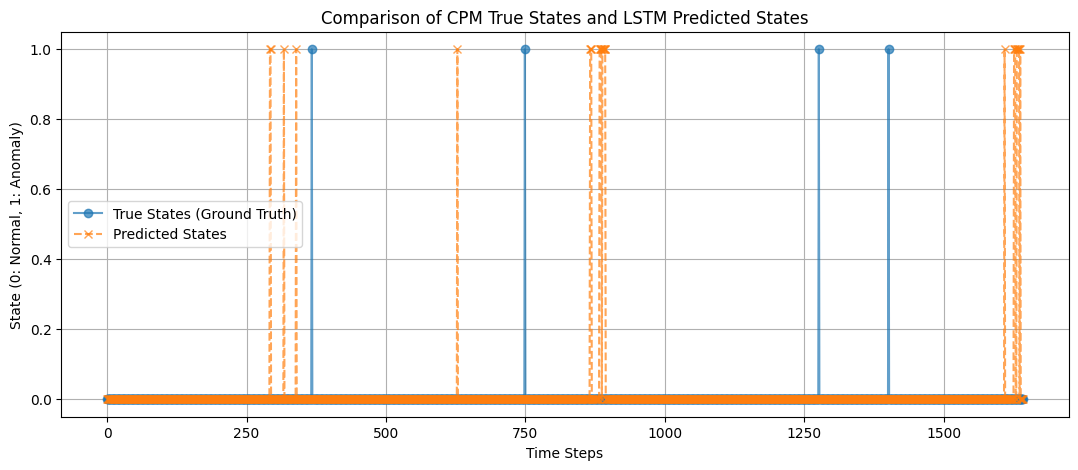

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.plot(cpm_true_states, label='True States (Ground Truth)', linestyle='-', marker='o', alpha=0.7)
plt.plot(cpm_data['lstm_predicted_abnormal'], label='Predicted States', linestyle='--', marker='x', alpha=0.7)

plt.xlabel('Time Steps')
plt.ylabel('State (0: Normal, 1: Anomaly)')
plt.title('Comparison of CPM True States and LSTM Predicted States')
plt.legend()
plt.grid()
plt.show()

### NAB Score

In [ ]:
### code here
# ----------------------------------------------------------------------
# Copyright (C) 2014-2015, Numenta, Inc.  Unless you have an agreement
# with Numenta, Inc., for a separate license for this software code, the
# following terms and conditions apply:
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Affero Public License version 3 as
# published by the Free Software Foundation.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
# See the GNU Affero Public License for more details.
#
# You should have received a copy of the GNU Affero Public License
# along with this program.  If not, see http://www.gnu.org/licenses.
#
# http://numenta.org/licenses/
# ----------------------------------------------------------------------
from collections import namedtuple
import logging
import math

logger = logging.getLogger(__name__)
AnomalyPoint = namedtuple(
  "AnomalyPoint",
  ["timestamp", "anomalyScore", "sweepScore", "windowName"]
)
ThresholdScore = namedtuple(
  "ThresholdScore",
  ["threshold", "score", "tp", "tn", "fp", "fn", "total"]
)


def sigmoid(x):
  """Standard sigmoid function."""
  return 1 / (1 + math.exp(-x))


def scaledSigmoid(relativePositionInWindow):
  """Return a scaled sigmoid function given a relative position within a
  labeled window.  The function is computed as follows:

  A relative position of -1.0 is the far left edge of the anomaly window and
  corresponds to S = 2*sigmoid(5) - 1.0 = 0.98661.  This is the earliest to be
  counted as a true positive.

  A relative position of -0.5 is halfway into the anomaly window and
  corresponds to S = 2*sigmoid(0.5*5) - 1.0 = 0.84828.

  A relative position of 0.0 consists of the right edge of the window and
  corresponds to S = 2*sigmoid(0) - 1 = 0.0.

  Relative positions > 0 correspond to false positives increasingly far away
  from the right edge of the window. A relative position of 1.0 is past the
  right  edge of the  window and corresponds to a score of 2*sigmoid(-5) - 1.0 =
  -0.98661.

  @param  relativePositionInWindow (float)  A relative position
                                            within a window calculated per the
                                            rules above.

  @return (float)
  """
  if relativePositionInWindow > 3.0:
    # FP well behind window
    val = -1.0
  else:
    val = 2*sigmoid(-5*relativePositionInWindow) - 1.0

  return val


def prepAnomalyListForScoring(inputAnomalyList):
  """
  Sort by anomaly score and filter all rows with 'probationary' window name
  """
  return sorted(
    [x for x in inputAnomalyList if x.windowName != 'probationary'],
    key=lambda x: x.anomalyScore,
    reverse=True)

class Sweeper(object):
  """Class used to iterate over all anomaly scores in a data set, generating
  threshold-score pairs for use in threshold optimization or dataset scoring.
  """

  def __init__(self, probationPercent=0.15, costMatrix=None):
    self.probationPercent = probationPercent

    self.tpWeight = 0
    self.fpWeight = 0
    self.fnWeight = 0

    if costMatrix is not None:
      self.setCostMatrix(costMatrix)


  def setCostMatrix(self, costMatrix):
    self.tpWeight = costMatrix["tpWeight"]
    self.fpWeight = costMatrix["fpWeight"]
    self.fnWeight = costMatrix["fnWeight"]


  def _getProbationaryLength(self, numRows):
    return min(
      math.floor(self.probationPercent * numRows),
      self.probationPercent * 5000
    )


  def _prepareScoreByThresholdParts(self, inputAnomalyList):
    scoreParts = {"fp": 0}
    for row in inputAnomalyList:
      if row.windowName not in ('probationary', None):
        scoreParts[row.windowName] = -self.fnWeight
    return scoreParts


  def calcSweepScore(
      self, timestamps, anomalyScores, windowLimits, dataSetName):
    """
    Given a single file's rows, return a list of AnomalyPoints.

    Each AnomalyPoint contains the row's timestamp, anomaly score,
    calculated NAB score, and window name. These lists may be passed
    to `calcScoreByThreshold()` directly in order to score or optimize
    a single file, or combined together prior to being passed to
    `calcScoreByThreshold()` in order to score / calculate multiple
    files / an entire corpus.

    @param timestamps:    (list)  `datetime` objects
    @param anomalyScores: (list)  `float` objects in the range [0.0, 1.0]
    @param windowLimits:  (list)  `tuple` objects of window limits
    @param dataSetName:   (list)  `string` name of dataset, often filename

    @return   (list) List of AnomalyPoint objects
    """
    assert len(timestamps) == len(anomalyScores), \
      "timestamps and anomalyScores should not be different lengths!"
    timestamps = list(timestamps)
    windowLimits = list(windowLimits)  # Copy because we mutate this list
    # The final list of anomaly points returned from this function.
    # Used for threshold optimization and scoring in other functions.
    anomalyList = []

    # One-time config variables
    maxTP = scaledSigmoid(-1.0)
    probationaryLength = self._getProbationaryLength(len(timestamps))

    # Iteration variables - these update as we iterate through the data
    curWindowLimits = None
    curWindowName = None
    curWindowWidth = None
    curWindowRightIndex = None
    prevWindowWidth = None
    prevWindowRightIndex = None

    for i, (curTime, curAnomaly) in enumerate(zip(timestamps, anomalyScores)):
      unweightedScore = None
      weightedScore = None

      # If not in a window, check if we've just entered one
      if windowLimits and curTime == windowLimits[0][0]:
        curWindowLimits = windowLimits.pop(0)
        curWindowName = "%s|%s" % (dataSetName, curWindowLimits[0])
        curWindowRightIndex = timestamps.index(curWindowLimits[1])
        curWindowWidth = float(curWindowRightIndex -
                               timestamps.index(curWindowLimits[0]) + 1)

        logger.debug(
          "Entering window: %s (%s)", curWindowName, str(curWindowLimits))

      # If in a window, score as if true positive
      if curWindowLimits is not None:
        positionInWindow = -(curWindowRightIndex - i + 1) / curWindowWidth
        unweightedScore = scaledSigmoid(positionInWindow)
        weightedScore = unweightedScore * self.tpWeight / maxTP

      # If outside a window, score as if false positive
      else:
        if prevWindowRightIndex is None:
          # No preceding window, so return score as is we were just really
          # far away from the nearest window.
          unweightedScore = -1.0
        else:
          numerator = abs(prevWindowRightIndex - i)
          denominator = float(prevWindowWidth - 1)
          positionPastWindow = numerator / denominator
          unweightedScore = scaledSigmoid(positionPastWindow)

        weightedScore = unweightedScore * self.fpWeight

      if i >= probationaryLength:
        pointWindowName = curWindowName
      else:
        pointWindowName = "probationary"

      point = AnomalyPoint(curTime, curAnomaly, weightedScore, pointWindowName)

      anomalyList.append(point)

      # If at right-edge of window, exit window.
      # This happens after processing the current point and appending it
      # to the list.
      if curWindowLimits is not None and curTime == curWindowLimits[1]:
        logger.debug("Exiting window: %s", curWindowName)
        prevWindowRightIndex = i
        prevWindowWidth = curWindowWidth
        curWindowLimits = None
        curWindowName = None
        curWindowWidth = None
        curWindowRightIndex = None

    return anomalyList


  def calcScoreByThreshold(self, anomalyList):
    """
    Find NAB scores for each threshold in `anomalyList`.

    @param anomalyList  (list) `AnomalyPoint` objects from `calcSweepScore()`

    @return (list)  List of `ThresholdScore` objects
    """
    scorableList = prepAnomalyListForScoring(anomalyList)
    scoreParts = self._prepareScoreByThresholdParts(scorableList)
    scoresByThreshold = []  # The final list we return

    # The current threshold above which an anomaly score is considered
    # an anomaly prediction. This starts above 1.0 so that all points
    # are skipped, which gives us a full false-negative score.
    curThreshold = 1.1

    # Initialize counts:
    # * every point in a window is a false negative
    # * every point outside a window is a true negative
    tn = sum(1 if x.windowName is None else 0 for x in scorableList)
    fn = sum(1 if x.windowName is not None else 0 for x in scorableList)
    tp = 0
    fp = 0

    # Iterate through every data point, starting with highest anomaly scores
    # and working down. Whenever we reach a new anomaly score, we save the
    # current score and begin calculating the score for the new, lower
    # threshold. Every data point we iterate over is 'active' for the current
    # threshold level, so the point is either:
    #   * a true positive (has a `windowName`)
    #   * a false positive (`windowName is None`).
    witnessed_window = []
    for dataPoint in scorableList:

      # If we've reached a new anomaly threshold, store the current
      # threshold+score pair.
      if dataPoint.anomalyScore != curThreshold:
        curScore = sum(scoreParts.values())
        totalCount = tp + tn + fp + fn
        print(tp)
        print('=====')
        s = ThresholdScore(curThreshold, curScore, tp, tn, fp, fn, totalCount)
        scoresByThreshold.append(s)
        curThreshold = dataPoint.anomalyScore

      # Adjust counts
      if dataPoint.windowName is not None:
        # print(dataPoint)
        # print(1)
        if dataPoint.windowName not in witnessed_window:
          # print(dataPoint)
          # print(witnessed_window)
          # print(dataPoint.windowName)
          tp += 1
          fn -= 1
          witnessed_window.append(dataPoint.windowName)
      else:
        fp += 1
        tn -= 1

      if dataPoint.windowName is None:
        scoreParts["fp"] += dataPoint.sweepScore
      else:
        scoreParts[dataPoint.windowName] = max(
          scoreParts[dataPoint.windowName],
          dataPoint.sweepScore
        )

    # Make sure to save the score for the last threshold
    curScore = sum(scoreParts.values())
    totalCount = tp + tn + fp + fn
    s = ThresholdScore(curThreshold, curScore, tp, tn, fp, fn, totalCount)
    scoresByThreshold.append(s)

    return scoresByThreshold


  def scoreDataSet(
      self, timestamps, anomalyScores, windowLimits, dataSetName, threshold):
    """Function called to score each dataset in the corpus.

    @param timestamps     (tuple) tuple of timestamps
    @param anomalyScores  (tuple) tuple of anomaly scores (floats [0, 1.0])
    @param windowLimits   (tuple) tuple of window limit tuples
    @param dataSetName    (string) name of this dataset, usually a file path.
      Used to name the windows in this dataset, which is important when scoring
      more than one data set, as each window in all data sets needs to be
      uniquely named.
    @param threshold      (float) the threshold at which an anomaly score is
      considered to be an anomaly prediction.

    @return
    :return:  (tuple) Contains:
      scores      (list) List of per-row scores, to be saved in score file
      matchingRow (ThresholdScore)
    """
    anomalyList = self.calcSweepScore(
      timestamps, anomalyScores, windowLimits, dataSetName)
    scoresByThreshold = self.calcScoreByThreshold(anomalyList)

    matchingRow = None
    prevRow = None
    for thresholdScore in scoresByThreshold:
      if thresholdScore.threshold == threshold:
        matchingRow = thresholdScore
        break
      elif thresholdScore.threshold < threshold:
        matchingRow = prevRow
        break

      prevRow = thresholdScore

    # Return sweepScore for each row, to be added to score file
    return (
      [x.sweepScore for x in anomalyList],
      matchingRow
    )


In [ ]:


def scoreCorpus(threshold, args):
  """Scores the corpus given a detector's results and a user profile.

  Scores the corpus in parallel.

  @param threshold  (float)   Threshold value to convert an anomaly score value
                              to a detection.

  @param args       (tuple)   Contains:

    pool                (multiprocessing.Pool)  Pool of processes to perform
                                                tasks in parallel.
    detectorName        (string)                Name of detector.

    profileName         (string)                Name of scoring profile.

    costMatrix          (dict)                  Cost matrix to weight the
                                                true positives, false negatives,
                                                and false positives during
                                                scoring.
    resultsDetectorDir  (string)                Directory for the results CSVs.

    resultsCorpus       (nab.Corpus)            Corpus object that holds the per
                                                record anomaly scores for a
                                                given detector.
    corpusLabel         (nab.CorpusLabel)       Ground truth anomaly labels for
                                                the NAB corpus.
    probationaryPercent (float)                 Percent of each data file not
                                                to be considered during scoring.
  """
  (pool,
   detectorName,
   profileName,
   costMatrix,
   resultsDetectorDir,
   resultsCorpus,
   corpusLabel,
   probationaryPercent,
   scoreFlag) = args

  args = []
  for relativePath, dataSet in resultsCorpus.dataFiles.items():
    if "_scores.csv" in relativePath:
      continue

    # relativePath: raw dataset file,
    # e.g. 'artificialNoAnomaly/art_noisy.csv'
    relativePath = convertResultsPathToDataPath(
      os.path.join(detectorName, relativePath))

    # outputPath: dataset results file,
    # e.g. 'results/detector/artificialNoAnomaly/detector_art_noisy.csv'
    relativeDir, fileName = os.path.split(relativePath)
    fileName =  detectorName + "_" + fileName
    outputPath = os.path.join(resultsDetectorDir, relativeDir, fileName)

    windows = corpusLabel.windows[relativePath]
    labels = corpusLabel.labels[relativePath]
    timestamps = labels['timestamp']

    anomalyScores = dataSet.data["anomaly_score"]

    args.append((
      detectorName,
      profileName,
      relativePath,
      outputPath,
      threshold,
      timestamps,
      anomalyScores,
      windows,
      costMatrix,
      probationaryPercent,
      scoreFlag))

  # Using `map_async` instead of `map` so interrupts are properly handled.
  # See: http://stackoverflow.com/a/1408476
  # Magic number is a timeout in seconds.
  results = pool.map_async(scoreDataSet, args).get(999999)

  # Total the 6 scoring metrics for all data files
  totals = [None]*3 + [0]*6
  for row in results:
    for i in range(6):
      totals[i+3] += row[i+4]

  results.append(["Totals"] + totals)

  resultsDF = pandas.DataFrame(data=results,
                               columns=("Detector", "Profile", "File",
                                        "Threshold", "Score", "TP", "TN",
                                        "FP", "FN", "Total_Count"))

  return resultsDF


def scoreDataSet(args):
  """Function called to score each dataset in the corpus.

  @param args   (tuple)  Arguments to get the detection score for a dataset.

  @return       (tuple)  Contains:
    detectorName  (string)  Name of detector used to get anomaly scores.

    profileName   (string)  Name of profile used to weight each detection type.
                            (tp, tn, fp, fn)

    relativePath  (string)  Path of dataset scored.

    threshold     (float)   Threshold used to convert anomaly scores to
                            detections.

    score         (float)   The score of the dataset.

    counts, tp    (int)     The number of true positive records.

    counts, tn    (int)     The number of true negative records.

    counts, fp    (int)     The number of false positive records.

    counts, fn    (int)     The number of false negative records.

    total count   (int)     The total number of records.
  """
  (detectorName,
   profileName,
   relativePath,
   outputPath,
   threshold,
   timestamps,
   anomalyScores,
   windows,
   costMatrix,
   probationaryPercent,
   scoreFlag) = args

  scorer = Sweeper(
    probationPercent=probationaryPercent,
    costMatrix=costMatrix
  )

  (scores, bestRow) = scorer.scoreDataSet(
    timestamps,
    anomalyScores,
    windows,
    relativePath,
    threshold,
  )

  if scoreFlag:
    # Append scoring function values to the respective results file
    dfCSV = pandas.read_csv(outputPath, header=0, parse_dates=[0])
    dfCSV["S(t)_%s" % profileName] = scores
    dfCSV.to_csv(outputPath, index=False)

  return (detectorName, profileName, relativePath, threshold, bestRow.score,
          bestRow.tp, bestRow.tn, bestRow.fp, bestRow.fn, bestRow.total)


In [ ]:
cpc_abnormal_timestamps = [
    "2011-07-16 09:15:01",
    "2011-07-16 14:15:01",
    "2011-07-22 12:15:01",
    "2011-07-22 16:15:01",
    "2011-08-23 08:15:01",
    "2011-08-28 13:15:01",
    "2011-09-04 09:15:01"
]
cpc_data['timestamp'] = pd.to_datetime(cpc_data['timestamp'])
abnormal_timestamps = pd.to_datetime(cpc_abnormal_timestamps)

# Add a new column to mark abnormal timestamps
cpc_data['is_abnormal'] = cpc_data['timestamp'].apply(
    lambda ts: 1 if ts in abnormal_timestamps else 0
)

cpc_data.head()


,timestamp,value,is_anomaly,dhmm_predicted_state,lstm_predicted_abnormal,is_abnormal
0,2011-07-01 00:15:01,0.091795,0,0,0.0,0
1,2011-07-01 01:15:01,0.074414,0,0,0.0,0
2,2011-07-01 02:15:01,0.056984,0,0,0.0,0
3,2011-07-01 03:15:01,0.071225,0,0,0.0,0
4,2011-07-01 04:15:01,0.045466,0,0,0.0,0


In [ ]:


# Assume cpc_data is already loaded as a pandas DataFrame with:
#   - "timestamp": string timestamps
#   - "value": numeric values
#   - "is_abnormal": boolean or binary column indicating ground truth anomalies
#   - "dhmm_predicted_state": predicted anomaly scores or states from your model

# Define the ground truth anomaly windows:
windowLimits = [
    ("2011-07-15 06:15:01.000000","2011-07-17 12:15:01.000000"),
    ("2011-08-01 07:15:01.000000","2011-08-03 15:15:01.000000"),
    ("2011-08-22 05:15:01.000000","2011-08-24 11:15:01.000000")
]

costMatrix = {
    "tpWeight": 1.0,
    	"fnWeight": 1.0,
    	"fpWeight": 0.11,
    	"tnWeight": 1.0
    # TNs have no weight in default NAB scoring.
}

# Convert window strings to pandas Timestamps
windowLimits = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in windowLimits]

# Convert timestamps in cpc_data to datetime and sort
cpc_data["timestamp"] = pd.to_datetime(cpc_data["timestamp"])
cpc_data = cpc_data.sort_values("timestamp")

# Extract needed arrays
timestamps = cpc_data["timestamp"].values
arma_results = cpc_data["is_abnormal"].values

# Set your scoring parameters
detectorName = "myDetector"     # Name your detector
profileName = "myProfile"       # Name your profile
relativePath = "cpc_data"       # Name or path to the dataset
outputPath = "cpm_data_results.csv"  # Output CSV (optional if scoreFlag=False)
threshold = 0.5
probationaryPercent = 0.0
scoreFlag = False               # Set to True if you want to save scoring data

# Prepare the arguments as required by scoreDataSet()
args = (
    detectorName,
    profileName,
    relativePath,
    outputPath,
    threshold,
    timestamps,
    arma_results,
    windowLimits,
    costMatrix,
    probationaryPercent,
    scoreFlag
)

for t, score in zip(timestamps, arma_results):
    if score > threshold:
        triggered_windows = [i for i, (start, end) in enumerate(windowLimits) if start <= t <= end]
        print(f"Detected anomaly at {t} in windows: {triggered_windows}")
results = scoreDataSet(args)
(detectorName, profileName, relativePath, threshold, score, tp, tn, fp, fn, total) = results

# Print out the results
print('results for ARMA - CPC data')
print(f"Threshold: {threshold}")
print("NAB Score: {:.6f}".format(score))
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")


Detected anomaly at 2011-07-16T09:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-16T14:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-22T12:15:01.000000000 in windows: []
Detected anomaly at 2011-07-22T16:15:01.000000000 in windows: []
Detected anomaly at 2011-08-23T08:15:01.000000000 in windows: [2]
Detected anomaly at 2011-08-28T13:15:01.000000000 in windows: []
Detected anomaly at 2011-09-04T09:15:01.000000000 in windows: []
0
=====
2
=====
results for ARMA - CPC data
Threshold: 0.5
NAB Score: 0.292288
True Positives (TP): 2
False Positives (FP): 4
False Negatives (FN): 163
True Negatives (TN): 1474


In [ ]:


# Assume cpc_data is already loaded as a pandas DataFrame with:
#   - "timestamp": string timestamps
#   - "value": numeric values
#   - "is_abnormal": boolean or binary column indicating ground truth anomalies
#   - "dhmm_predicted_state": predicted anomaly scores or states from your model

# Define the ground truth anomaly windows:
windowLimits = [
    ("2011-07-15 06:15:01.000000","2011-07-17 12:15:01.000000"),
    ("2011-08-01 07:15:01.000000","2011-08-03 15:15:01.000000"),
    ("2011-08-22 05:15:01.000000","2011-08-24 11:15:01.000000")
]

costMatrix = {
    "tpWeight": 1.0,
    	"fnWeight": 1.0,
    	"fpWeight": 0.11,
    	"tnWeight": 1.0
    # TNs have no weight in default NAB scoring.
}

# Convert window strings to pandas Timestamps
windowLimits = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in windowLimits]

# Convert timestamps in cpc_data to datetime and sort
cpc_data["timestamp"] = pd.to_datetime(cpc_data["timestamp"])
cpc_data = cpc_data.sort_values("timestamp")

# Extract needed arrays
timestamps = cpc_data["timestamp"].values
arma_results = cpc_data["dhmm_predicted_state"].values

# Set your scoring parameters
detectorName = "myDetector"     # Name your detector
profileName = "myProfile"       # Name your profile
relativePath = "cpc_data"       # Name or path to the dataset
outputPath = "cpm_data_results.csv"  # Output CSV (optional if scoreFlag=False)
threshold = 0.5
probationaryPercent = 0.0
scoreFlag = False               # Set to True if you want to save scoring data

# Prepare the arguments as required by scoreDataSet()
args = (
    detectorName,
    profileName,
    relativePath,
    outputPath,
    threshold,
    timestamps,
    arma_results,
    windowLimits,
    costMatrix,
    probationaryPercent,
    scoreFlag
)

# Score the dataset using the official NAB scoring function
for t, score in zip(timestamps, arma_results):
    if score > threshold:
        triggered_windows = [i for i, (start, end) in enumerate(windowLimits) if start <= t <= end]
        print(f"Detected anomaly at {t} in windows: {triggered_windows}")

results = scoreDataSet(args)
(detectorName, profileName, relativePath, threshold, score, tp, tn, fp, fn, total) = results

# Print out the results
print('results for DHMM - CPC data')
print(f"Threshold: {threshold}")
print("NAB Score: {:.6f}".format(score))
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")


Detected anomaly at 2011-07-16T10:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-16T11:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-16T12:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-16T13:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-16T14:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-16T15:15:01.000000000 in windows: [0]
Detected anomaly at 2011-08-23T09:15:01.000000000 in windows: [2]
0
=====
2
=====
results for DHMM - CPC data
Threshold: 0.5
NAB Score: 0.706414
True Positives (TP): 2
False Positives (FP): 0
False Negatives (FN): 163
True Negatives (TN): 1478


In [ ]:


# Assume cpc_data is already loaded as a pandas DataFrame with:
#   - "timestamp": string timestamps
#   - "value": numeric values
#   - "is_abnormal": boolean or binary column indicating ground truth anomalies
#   - "dhmm_predicted_state": predicted anomaly scores or states from your model

# Define the ground truth anomaly windows:
windowLimits = [
    ("2011-07-15 06:15:01.000000","2011-07-17 12:15:01.000000"),
    ("2011-08-01 07:15:01.000000","2011-08-03 15:15:01.000000"),
    ("2011-08-22 05:15:01.000000","2011-08-24 11:15:01.000000")
]

costMatrix = {
    "tpWeight": 1.0,
    	"fnWeight": 1.0,
    	"fpWeight": 0.11,
    	"tnWeight": 1.0
    # TNs have no weight in default NAB scoring.
}

# Convert window strings to pandas Timestamps
windowLimits = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in windowLimits]

# Convert timestamps in cpc_data to datetime and sort
cpc_data["timestamp"] = pd.to_datetime(cpc_data["timestamp"])
cpc_data = cpc_data.sort_values("timestamp")

# Extract needed arrays
timestamps = cpc_data["timestamp"].values
arma_results = cpc_data["lstm_predicted_abnormal"].values

# Set your scoring parameters
detectorName = "myDetector"     # Name your detector
profileName = "myProfile"       # Name your profile
relativePath = "cpc_data"       # Name or path to the dataset
outputPath = "cpm_data_results.csv"  # Output CSV (optional if scoreFlag=False)
threshold = 0.5
probationaryPercent = 0.0
scoreFlag = False               # Set to True if you want to save scoring data

# Prepare the arguments as required by scoreDataSet()
args = (
    detectorName,
    profileName,
    relativePath,
    outputPath,
    threshold,
    timestamps,
    arma_results,
    windowLimits,
    costMatrix,
    probationaryPercent,
    scoreFlag
)

# Score the dataset using the official NAB scoring function
for t, score in zip(timestamps, arma_results):
    if score > threshold:
        triggered_windows = [i for i, (start, end) in enumerate(windowLimits) if start <= t <= end]
        print(f"Detected anomaly at {t} in windows: {triggered_windows}")

results = scoreDataSet(args)
(detectorName, profileName, relativePath, threshold, score, tp, tn, fp, fn, total) = results

# Print out the results
print('results for LSTM - CPC data')
print(f"Threshold: {threshold}")
print("NAB Score: {:.6f}".format(score))
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")


Detected anomaly at 2011-07-13T01:15:01.000000000 in windows: []
Detected anomaly at 2011-07-13T02:15:01.000000000 in windows: []
Detected anomaly at 2011-07-13T06:15:01.000000000 in windows: []
Detected anomaly at 2011-07-15T05:15:01.000000000 in windows: []
Detected anomaly at 2011-09-06T23:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T00:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T03:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T05:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T06:15:01.000000000 in windows: []
0
=====
0
=====
results for LSTM - CPC data
Threshold: 0.5
NAB Score: -3.990000
True Positives (TP): 0
False Positives (FP): 9
False Negatives (FN): 165
True Negatives (TN): 1469


### CPM

In [ ]:


cpm_data.head()

# Convert timestamps
cpm_data['timestamp'] = pd.to_datetime(cpm_data['timestamp'])

# Define abnormal timestamps
cpm_arma_abnormal_timestamps = pd.to_datetime([
    "2011-07-16 09:15:01",
    "2011-07-16 14:15:01",
    "2011-07-22 12:15:01",
    "2011-07-22 16:15:01",
    "2011-08-23 08:15:01",
    "2011-08-28 13:15:01",
    "2011-09-04 09:15:01"
])

# Add the arma column
cpm_data['arma'] = cpm_data['timestamp'].apply(lambda ts: 1 if ts in cpm_arma_abnormal_timestamps else 0)

# Now cpm_data should have the 'arma' column
cpm_data.head()



,timestamp,value,is_anomaly,dhmm_predicted_state,lstm_predicted_abnormal,arma,lstm_value
0,2011-07-01 00:15:01,0.618226,0,1,0.0,0,0.000000
1,2011-07-01 01:15:01,0.506628,0,1,0.0,0,0.002021
2,2011-07-01 02:15:01,0.399551,0,1,0.0,0,0.002082
3,2011-07-01 03:15:01,0.482681,0,1,0.0,0,0.002143
4,2011-07-01 04:15:01,0.306038,0,1,0.0,0,0.002095


In [ ]:


# Assume cpc_data is already loaded as a pandas DataFrame with:
#   - "timestamp": string timestamps
#   - "value": numeric values
#   - "is_abnormal": boolean or binary column indicating ground truth anomalies
#   - "dhmm_predicted_state": predicted anomaly scores or states from your model

# Define the ground truth anomaly windows:
windowLimits = [
    ("2011-07-15 13:15:01.000000","2011-07-17 05:15:01.000000"),
    ("2011-07-31 11:15:01.000000","2011-08-02 05:15:01.000000"),
    ("2011-08-22 12:15:01.000000","2011-08-24 04:15:01.000000"),
    ("2011-08-27 17:15:01.000000","2011-08-29 09:15:01.000000")
]

costMatrix = {
    "tpWeight": 1.0,
    	"fnWeight": 1.0,
    	"fpWeight": 0.11,
    	"tnWeight": 1.0
    # TNs have no weight in default NAB scoring.
}

# Convert window strings to pandas Timestamps
windowLimits = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in windowLimits]

# Convert timestamps in cpc_data to datetime and sort
cpm_data["timestamp"] = pd.to_datetime(cpm_data["timestamp"])
cpm_data = cpm_data.sort_values("timestamp")

# Extract needed arrays
timestamps = cpm_data["timestamp"].values
dhmm_anomalyScores = cpm_data["arma"].values

# Set your scoring parameters
detectorName = "myDetector"     # Name your detector
profileName = "myProfile"       # Name your profile
relativePath = "cpm_data"       # Name or path to the dataset
outputPath = "cpm_data_results.csv"  # Output CSV (optional if scoreFlag=False)
threshold = 0.5
probationaryPercent = 0.0
scoreFlag = False               # Set to True if you want to save scoring data

# Prepare the arguments as required by scoreDataSet()
args = (
    detectorName,
    profileName,
    relativePath,
    outputPath,
    threshold,
    timestamps,
    dhmm_anomalyScores,
    windowLimits,
    costMatrix,
    probationaryPercent,
    scoreFlag
)

# Score the dataset using the official NAB scoring function
for t, score in zip(timestamps, dhmm_anomalyScores):
    if score > threshold:
        triggered_windows = [i for i, (start, end) in enumerate(windowLimits) if start <= t <= end]
        print(f"Detected anomaly at {t} in windows: {triggered_windows}")

results = scoreDataSet(args)
(detectorName, profileName, relativePath, threshold, score, tp, tn, fp, fn, total) = results

# Print out the results
print('results for ARMA - CPM data')
print(f"Threshold: {threshold}")
print("NAB Score: {:.6f}".format(score))
print(f"True Positives (TP): {tp}")
# print(type(tp))
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")


Detected anomaly at 2011-07-16T09:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-16T14:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-22T12:15:01.000000000 in windows: []
Detected anomaly at 2011-07-22T16:15:01.000000000 in windows: []
Detected anomaly at 2011-08-23T08:15:01.000000000 in windows: [2]
Detected anomaly at 2011-08-28T13:15:01.000000000 in windows: [3]
Detected anomaly at 2011-09-04T09:15:01.000000000 in windows: []
0
=====
3
=====
results for ARMA - CPM data
Threshold: 0.5
NAB Score: 1.274710
True Positives (TP): 3
False Positives (FP): 3
False Negatives (FN): 161
True Negatives (TN): 1476


In [ ]:


# Assume cpc_data is already loaded as a pandas DataFrame with:
#   - "timestamp": string timestamps
#   - "value": numeric values
#   - "is_abnormal": boolean or binary column indicating ground truth anomalies
#   - "dhmm_predicted_state": predicted anomaly scores or states from your model

# Define the ground truth anomaly windows:
windowLimits = [
    ("2011-07-15 13:15:01.000000","2011-07-17 05:15:01.000000"),
    ("2011-07-31 11:15:01.000000","2011-08-02 05:15:01.000000"),
    ("2011-08-22 12:15:01.000000","2011-08-24 04:15:01.000000"),
    ("2011-08-27 17:15:01.000000","2011-08-29 09:15:01.000000")
]

costMatrix = {
    "tpWeight": 1.0,
    	"fnWeight": 1.0,
    	"fpWeight": 0.11,
    	"tnWeight": 1.0
    # TNs have no weight in default NAB scoring.
}

# Convert window strings to pandas Timestamps
windowLimits = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in windowLimits]

# Convert timestamps in cpc_data to datetime and sort
cpm_data["timestamp"] = pd.to_datetime(cpm_data["timestamp"])
cpm_data = cpm_data.sort_values("timestamp")

# Extract needed arrays
timestamps = cpm_data["timestamp"].values
dhmm_anomalyScores = cpm_data["dhmm_predicted_state"].values

# Set your scoring parameters
detectorName = "myDetector"     # Name your detector
profileName = "myProfile"       # Name your profile
relativePath = "cpm_data"       # Name or path to the dataset
outputPath = "cpm_data_results.csv"  # Output CSV (optional if scoreFlag=False)
threshold = 0.5
probationaryPercent = 0.0
scoreFlag = False               # Set to True if you want to save scoring data

# Prepare the arguments as required by scoreDataSet()
args = (
    detectorName,
    profileName,
    relativePath,
    outputPath,
    threshold,
    timestamps,
    dhmm_anomalyScores,
    windowLimits,
    costMatrix,
    probationaryPercent,
    scoreFlag
)

# Score the dataset using the official NAB scoring function
for t, score in zip(timestamps, dhmm_anomalyScores):
    if score > threshold:
        triggered_windows = [i for i, (start, end) in enumerate(windowLimits) if start <= t <= end]
        print(f"Detected anomaly at {t} in windows: {triggered_windows}")

results = scoreDataSet(args)
(detectorName, profileName, relativePath, threshold, score, tp, tn, fp, fn, total) = results

# Print out the results
print('results for DHMM - CPM data')
print(f"Threshold: {threshold}")
print("NAB Score: {:.6f}".format(score))
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")


Detected anomaly at 2011-07-11T01:15:01.000000000 in windows: []
Detected anomaly at 2011-07-16T10:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-16T15:15:01.000000000 in windows: [0]
Detected anomaly at 2011-07-22T13:15:01.000000000 in windows: []
Detected anomaly at 2011-07-22T17:15:01.000000000 in windows: []
Detected anomaly at 2011-08-03T00:15:01.000000000 in windows: []
Detected anomaly at 2011-08-03T01:15:01.000000000 in windows: []
Detected anomaly at 2011-08-23T09:15:01.000000000 in windows: [2]
Detected anomaly at 2011-08-24T02:15:01.000000000 in windows: [2]
Detected anomaly at 2011-08-27T12:15:01.000000000 in windows: []
Detected anomaly at 2011-08-28T14:15:01.000000000 in windows: [3]
Detected anomaly at 2011-08-29T11:15:01.000000000 in windows: []
Detected anomaly at 2011-08-31T21:15:01.000000000 in windows: []
Detected anomaly at 2011-08-31T22:15:01.000000000 in windows: []
Detected anomaly at 2011-08-31T23:15:01.000000000 in windows: []
Detected anomaly at 

In [ ]:


# Assume cpc_data is already loaded as a pandas DataFrame with:
#   - "timestamp": string timestamps
#   - "value": numeric values
#   - "is_abnormal": boolean or binary column indicating ground truth anomalies
#   - "dhmm_predicted_state": predicted anomaly scores or states from your model

# Define the ground truth anomaly windows:
windowLimits = [
    ("2011-07-15 13:15:01.000000","2011-07-17 05:15:01.000000"),
    ("2011-07-31 11:15:01.000000","2011-08-02 05:15:01.000000"),
    ("2011-08-22 12:15:01.000000","2011-08-24 04:15:01.000000"),
    ("2011-08-27 17:15:01.000000","2011-08-29 09:15:01.000000")
]

costMatrix = {
    "tpWeight": 1.0,
    	"fnWeight": 1.0,
    	"fpWeight": 0.11,
    	"tnWeight": 1.0
    # TNs have no weight in default NAB scoring.
}

# Convert window strings to pandas Timestamps
windowLimits = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in windowLimits]

# Convert timestamps in cpc_data to datetime and sort
cpm_data["timestamp"] = pd.to_datetime(cpm_data["timestamp"])
cpm_data = cpm_data.sort_values("timestamp")

# Extract needed arrays
timestamps = cpm_data["timestamp"].values
dhmm_anomalyScores = cpm_data["lstm_predicted_abnormal"].values

# Set your scoring parameters
detectorName = "myDetector"     # Name your detector
profileName = "myProfile"       # Name your profile
relativePath = "cpm_data"       # Name or path to the dataset
outputPath = "cpm_data_results.csv"  # Output CSV (optional if scoreFlag=False)
threshold = 0.5
probationaryPercent = 0.0
scoreFlag = False               # Set to True if you want to save scoring data

# Prepare the arguments as required by scoreDataSet()
args = (
    detectorName,
    profileName,
    relativePath,
    outputPath,
    threshold,
    timestamps,
    dhmm_anomalyScores,
    windowLimits,
    costMatrix,
    probationaryPercent,
    scoreFlag
)

# Score the dataset using the official NAB scoring function
for t, score in zip(timestamps, dhmm_anomalyScores):
    if score > threshold:
        triggered_windows = [i for i, (start, end) in enumerate(windowLimits) if start <= t <= end]
        print(f"Detected anomaly at {t} in windows: {triggered_windows}")

results = scoreDataSet(args)
(detectorName, profileName, relativePath, threshold, score, tp, tn, fp, fn, total) = results

# Print out the results
print('results for LSTM - CPM data')
print(f"Threshold: {threshold}")
print("NAB Score: {:.6f}".format(score))
print(f"True Positives (TP): {tp}")
# print(type(tp))
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")


Detected anomaly at 2011-08-06T06:15:01.000000000 in windows: []
Detected anomaly at 2011-08-06T07:15:01.000000000 in windows: []
Detected anomaly at 2011-08-06T08:15:01.000000000 in windows: []
Detected anomaly at 2011-08-07T05:15:01.000000000 in windows: []
Detected anomaly at 2011-08-07T06:15:01.000000000 in windows: []
Detected anomaly at 2011-08-07T07:15:01.000000000 in windows: []
Detected anomaly at 2011-09-06T23:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T00:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T03:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T04:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T05:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T06:15:01.000000000 in windows: []
Detected anomaly at 2011-09-07T07:15:01.000000000 in windows: []
0
=====
0
=====
results for LSTM - CPM data
Threshold: 0.5
NAB Score: -5.429997
True Positives (TP): 0
False Positives (FP): 13
False Negatives (FN): 164
T